<a href="https://colab.research.google.com/github/vvvin333/SecureBox/blob/main/SecureBox_Flipper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
def isLocked(matrix):
  return np.any(matrix) # if any element==True

In [ ]:
def flip(x, y, matrix):
  matrix[x] = np.logical_not(matrix[x])
  matrix[:, y] = np.logical_not(matrix[:, y])
  matrix[x, y] = not matrix[x, y]

In [ ]:
def generate_steps(num_steps, matrix):
  steps = []
  for i in range(num_steps):
    x = random.randrange(x_size)
    y = random.randrange(y_size)
    if (x,y) not in steps:
      steps.append((x,y))
      flip(x, y, matrix)
  return steps

def show_steps(steps, matrix, show=False):
  print(steps)
  print(np.asarray(matrix, dtype=int))
  if show:
    plt.matshow(matrix)
    plt.colorbar()
    plt.show()

In [ ]:
def execute_steps(steps, matrix):
  for x, y in steps:
    flip(x, y, matrix)

Default "opened" matrix

In [ ]:
x_size, y_size = 3, 3
matrix = np.zeros((x_size, y_size), dtype=bool)

Randomly generate flip steps.

In [ ]:
steps = generate_steps(10, matrix)
show_steps(steps, matrix)

[(0, 1), (2, 2), (1, 0), (3, 0), (3, 1), (2, 1)]
[[1 1 0]
 [0 0 0]
 [0 0 0]
 [1 0 1]]


[(0, 0), (0, 1), (0, 2), (1, 0)]
[[0 1 1]
 [0 0 0]
 [0 1 1]]


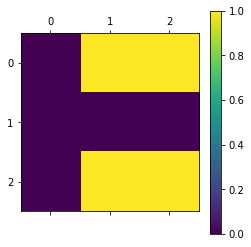

In [ ]:
execute_steps(steps, matrix)
show_steps(steps, matrix, show=True)

One flip sample.

In [ ]:
x, y = (4, 3)
flip(x, y, matrix)
print(np.asarray(matrix, dtype=int))
plt.matshow(matrix)
plt.colorbar()
plt.show()

In [ ]:
def isKthBitSet(n, k): 
    if n & (1 << k): 
        return True 
    else: 
        return False 

In [ ]:
def openBox(matrix):
  for sample in range(1, 2**matrix.size):
    sample_steps = []
    for bit in range(matrix.size):
      if bit>np.log2(sample):
        break
      number = bit if isKthBitSet(sample, bit) else -1
      if number<0:
        continue
      x = number // y_size
      y = number % y_size
      sample_steps.append((x, y))
    
    # check
    m_copy = np.copy(matrix) 
    execute_steps(sample_steps, m_copy)
    if not isLocked(m_copy):
      print(sample_steps)
      break

  return sample_steps

To open/lock Box one can execute the next ceil twice.

[(0, 0), (0, 2), (1, 0), (2, 0), (3, 0), (3, 1)]
[[1 1 0]
 [0 0 0]
 [0 0 0]
 [1 0 1]]


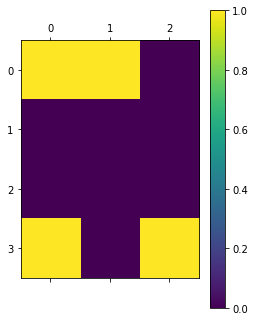

In [ ]:
sample_steps = openBox(matrix)
execute_steps(sample_steps, matrix)
show_steps(sample_steps, matrix, show=True)

In [ ]:
steps==sample_steps

False